# DSBDL Assignment 02 - Data Wrangling 2

Create an “Academic performance” dataset of students and perform the following operations 
using Python. 
1. Scan all variables for missing values and inconsistencies. If there are missing values 
and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable 
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to 
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

Dataset details: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme( rc={ "figure.figsize": (5,3) } )

In [2]:
ds = pd.read_csv( "dataset.csv" )
ds.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
ds = ds.rename( columns={
    "race/ethnicity": "race" , 
    "parental level of education": "parent_edu" , 
    "test preparation course": "course_completed" , 
    "math score": "score_math" , 
    "reading score": "score_reading" , 
    "writing score": "score_writing"
} )
ds.head()

,gender,race,parent_edu,lunch,course_completed,score_math,score_reading,score_writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
ds.dtypes

gender              object
race                object
parent_edu          object
lunch               object
course_completed    object
score_math           int64
score_reading        int64
score_writing        int64
dtype: object

## 1. Checking for missing values

In [5]:
ds.isna().sum()

gender              0
race                0
parent_edu          0
lunch               0
course_completed    0
score_math          0
score_reading       0
score_writing       0
dtype: int64

## 2. Analysis of numeric variables: `score_math`, `score_reading` and `score_writing`

### 2.1. Visualizing distributions of numeric variables

<Axes: xlabel='score_math', ylabel='Count'>

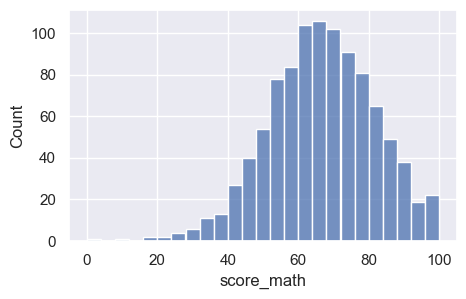

In [6]:
sns.histplot( ds.score_math )

<Axes: xlabel='score_reading', ylabel='Count'>

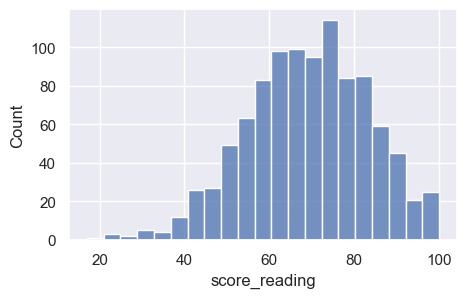

In [7]:
sns.histplot( ds.score_reading )

<Axes: xlabel='score_writing', ylabel='Count'>

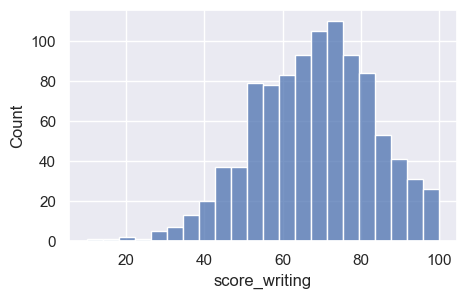

In [8]:
sns.histplot( ds.score_writing )

### 2.2. Remove outliers with IQR Rule

In [9]:
def remove_outliers(feature):
    global ds
    q3 , q1 = np.percentile( ds[feature] , [ 75 , 25 ] )
    iqr = q3 - q1
    ds = ds[ (ds[feature] >= q1 - 1.5 * iqr) & (ds[feature] <= q3 + 1.5 * iqr) ]
    
remove_outliers( "score_writing" )
remove_outliers( "score_math" )
remove_outliers( "score_reading" )

<Axes: xlabel='score_math', ylabel='Count'>

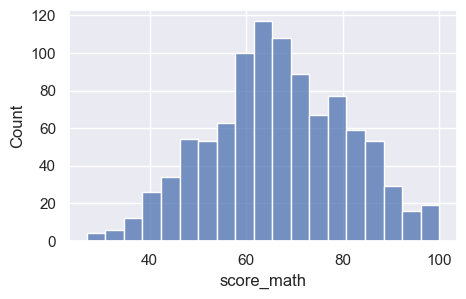

In [10]:
sns.histplot( ds.score_math )

<Axes: xlabel='score_reading', ylabel='Count'>

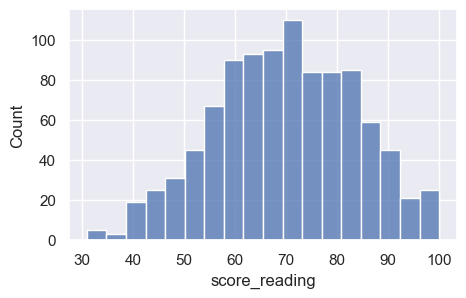

In [11]:
sns.histplot( ds.score_reading )

<Axes: xlabel='score_writing', ylabel='Count'>

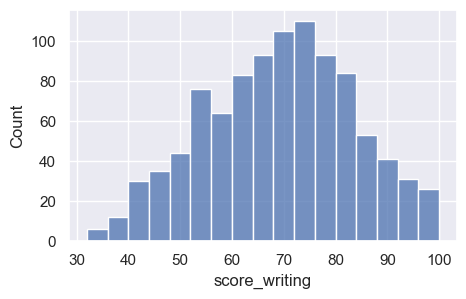

In [12]:
sns.histplot( ds.score_writing )

## 3. Data Transformation

### 3.1. Encoding categorical variables

In [13]:
def encode_categorical(feature):
    values = ds[feature].unique()
    label = 0
    for val in values:
        ds.loc[ ds[feature] == val , feature ] = label
        label += 1

encode_categorical( "gender" )
encode_categorical( "race" )
encode_categorical( "parent_edu" )
encode_categorical( "lunch" )
encode_categorical( "course_completed" )

### 3.2. Normalizing numeric features

In [14]:
# As outliers are eliminated, both min-max or z-score
# normalization can be used
# Ref: https://stats.stackexchange.com/questions/547446/z-score-vs-min-max-normalization
def z_score( feature ):
    ds[feature] = ( ds[feature] - ds[feature].mean() ) / ds[feature].std()

z_score( "score_reading" ) 
z_score( "score_writing" ) 
z_score( "score_math" ) 

In [15]:
ds

,gender,race,parent_edu,lunch,course_completed,score_math,score_reading,score_writing
0,0,0,0,0,0,0.369943,0.163678,0.370964
1,0,1,1,0,1,0.160750,1.457644,1.341360
2,0,0,2,0,0,1.625105,1.817079,1.687930
3,1,2,3,1,0,-1.373337,-0.914627,-1.708457
4,1,1,1,0,0,0.648868,0.595000,0.440278
...,...,...,...,...,...,...,...,...
995,0,4,2,0,1,1.485643,2.104627,1.826558
996,1,1,4,1,0,-0.327369,-1.058402,-0.946003
997,0,1,4,1,1,-0.536563,0.091791,-0.252863
998,0,3,1,0,1,0.091018,0.595000,0.578906
